# Exercise 4

**In this exercise you will apply some of the numerical transformation methods that you have learned in the session.**

In [99]:
# imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#get dataset
from sklearn.datasets import fetch_california_housing 

# for Q-Q plots
import scipy.stats as stats

# with open-source packages
from sklearn.preprocessing import FunctionTransformer


In [100]:
#helper functions 
# plot histogram and Q-Q plots to have a look at the variable distribution
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

**We will work with the california housing dataset.In the next cell we will be fetching dataset from sklearn.datasets**

In [101]:
#1. load the dataset 

cal_dataset = fetch_california_housing()


# create a dataframe with the independent variables
data = pd.DataFrame(cal_dataset.data,                  # get data
                    columns=cal_dataset.feature_names) # get corresponding columns

In [102]:
#2. check the dataset by printing head 
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


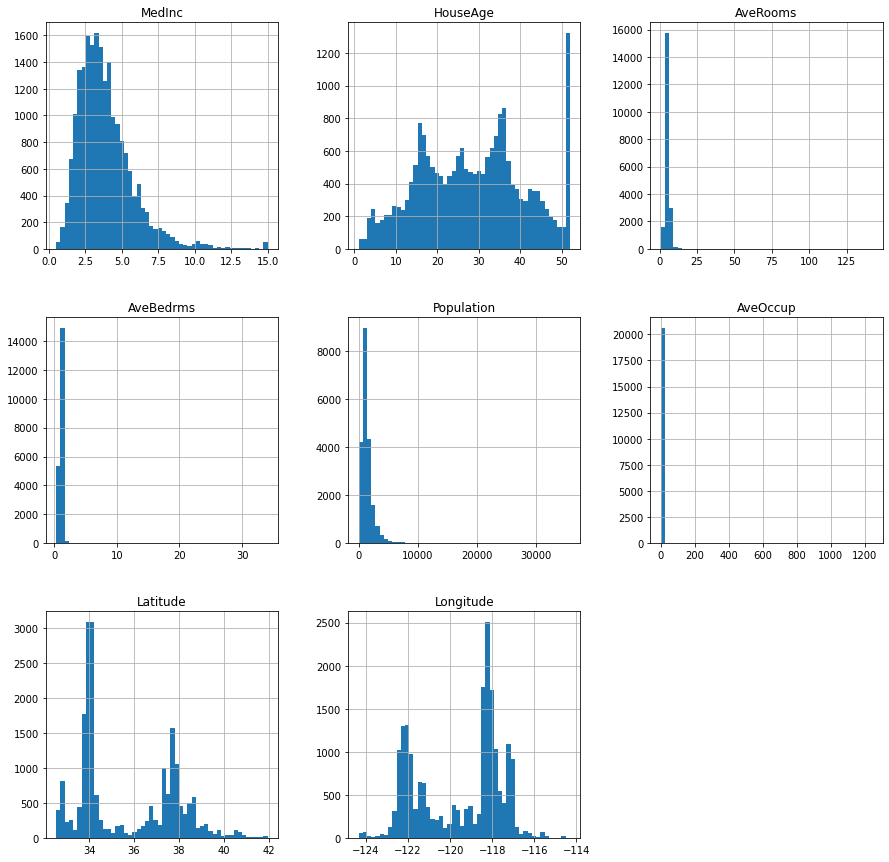

In [103]:
#3. check how the variables are distributed by plotting histogram 
data.hist(figsize=(15,15),bins=50)
plt.show()

In [104]:
#4. make a copy of the original dataframe by using ".copy()" method.

#make a copy of the data 
df_transformed = data.copy()

**Apply logarithmic transformation on variable "Population". plot the transformed variable using the "diagnostic_plots" function as used above. What changes do you observe?**

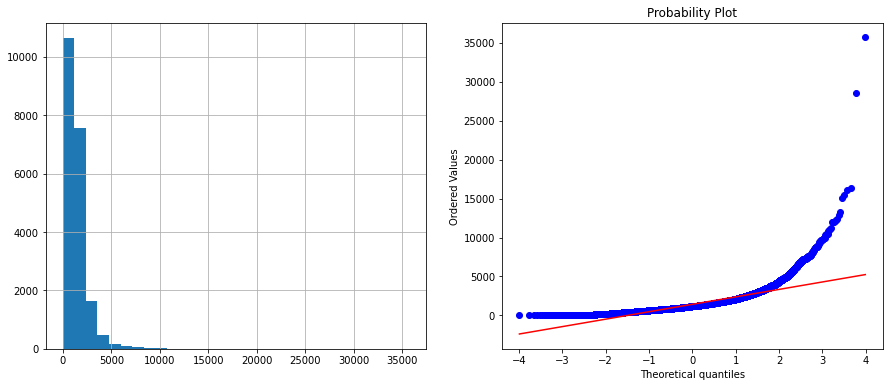

In [105]:
diagnostic_plots(df=df_transformed,variable = 'Population')  # check the variable

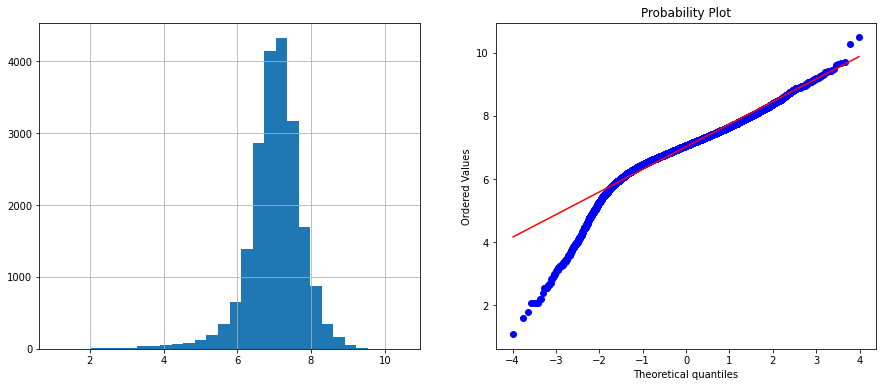

In [106]:
#your code here 
#hints : 1)Apply log transformation using "np.log" function on the variable and store transformed variable 
#         as a new variable in df_transformed.

df_transformed['log_Population'] = np.log(df_transformed[['Population']])

# plot 
diagnostic_plots(df=df_transformed,
                 variable = 'log_Population')

**Now apply "Reciprocal Transform" on the variable "House Age" using the function "ReciprocalTransformer" and plot as you did before.**

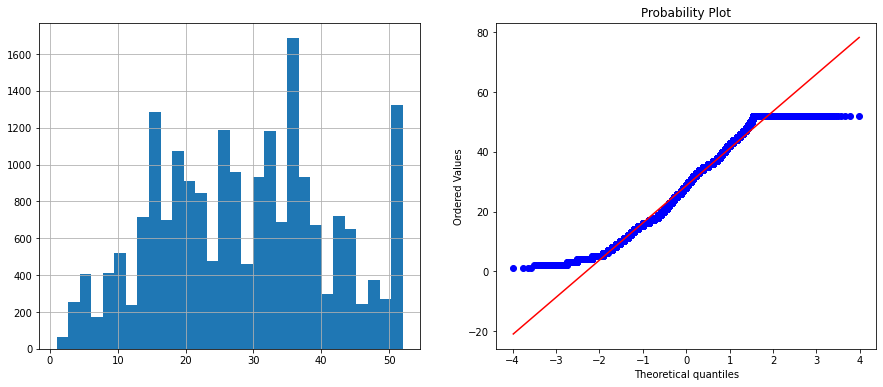

In [107]:
diagnostic_plots(df=df_transformed,
                 variable = 'HouseAge')  # check the variable

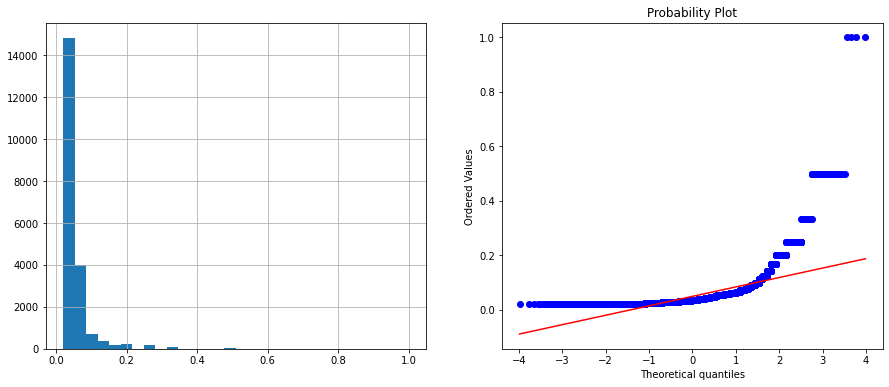

In [108]:
# your code here 

#build a reciprocal transformer
rt = FunctionTransformer(func = np.reciprocal,
                         validate=True)

# get reciprocal transformed House Age 
df_transformed['recip_HouseAge'] = rt.fit_transform(df_transformed[['HouseAge']]) # enter the dataframe column to be transformed

# plot 
diagnostic_plots(df=df_transformed,variable = 'recip_HouseAge')

**Now apply Square transformation (square the values of defined variable) on variable "AveRooms" and plot.**

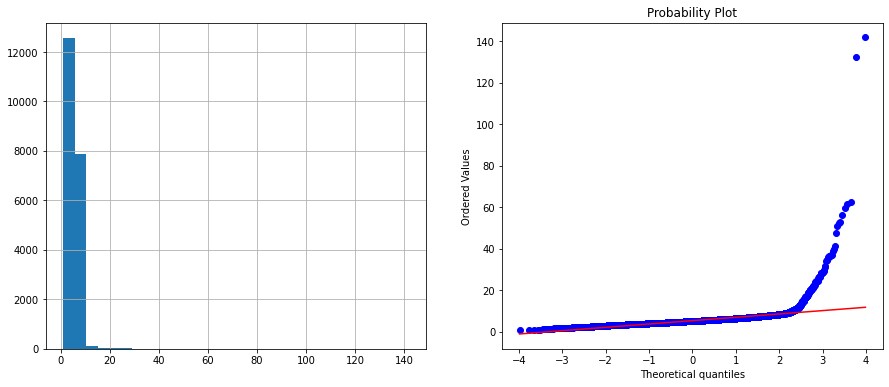

In [109]:
diagnostic_plots(df=df_transformed,
                 variable = 'AveRooms') # check the variable

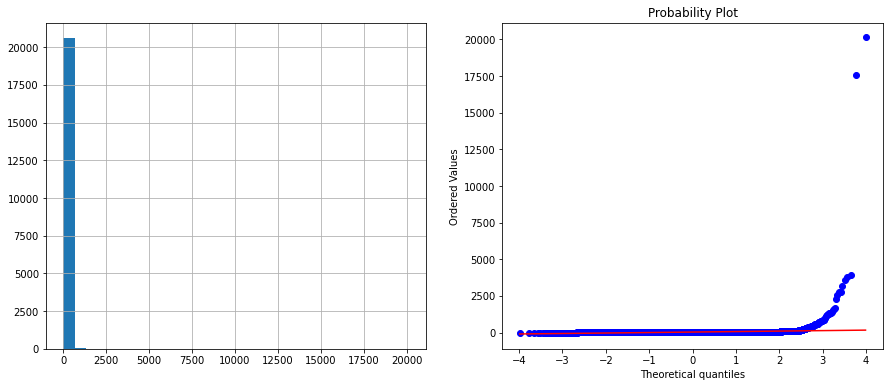

In [110]:
#5. transform
transformer = FunctionTransformer(np.square,       # enter function to calculate square
                                  validate=True)

# fit and transform the above function to "AveRooms"
df_transformed['sqrt_AveRooms'] = transformer.fit_transform(df_transformed[['AveRooms']]) # enter the dataframe column that you want to transform

#plot
diagnostic_plots(df=df_transformed,
                 variable = 'sqrt_AveRooms')

**Bonus: If you have completed the above steps, try experimenting with other transformations with these variables , and see what fits the data best.**